In [1]:
from latex2svg import latex2svg as l2s, default_params
import cairo
from IPython import display
import math

from gi.repository import Rsvg

/home/mark/miniprojects/math/animations/venv/lib/python3.5/site-packages/ipykernel_launcher.py:5: PyGIWarning: Rsvg was imported without specifying a version first. Use gi.require_version('Rsvg', '2.0') before import to ensure that the right version gets loaded.
  """


In [2]:
my_params = default_params
my_params['fontsize'] = 12
out = l2s(r'\( e^{i \pi} = -1 \)', params=my_params, working_directory="./tmp")

In [7]:
WIDTH, HEIGHT = 256, 256

surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, WIDTH, HEIGHT)
ctx = cairo.Context(surface)


ctx.scale(WIDTH, HEIGHT)  # Normalizing the canvas

pat = cairo.LinearGradient(0.0, 0.0, 0.0, 1.0)
pat.add_color_stop_rgba(1, 0.7, 0, 0, 0.5)  # First stop, 50% opacity
pat.add_color_stop_rgba(0, 0.9, 0.7, 0.2, 1)  # Last stop, 100% opacity

ctx.rectangle(0, 0, 1, 1)  # Rectangle(x0, y0, x1, y1)
ctx.set_source(pat)
ctx.fill()

ctx.translate(0.1, 0.1)  # Changing the current transformation matrix

ctx.move_to(0, 0)
# Arc(cx, cy, radius, start_angle, stop_angle)
ctx.arc(0.2, 0.1, 0.1, -math.pi / 2, 0)
ctx.line_to(0.5, 0.1)  # Line to (x,y)
# Curve(x1, y1, x2, y2, x3, y3)
ctx.curve_to(0.5, 0.2, 0.5, 0.4, 0.2, 0.8)
ctx.close_path()

ctx.set_source_rgb(0.3, 0.2, 0.5)  # Solid color
ctx.set_line_width(0.02)
ctx.stroke()

svg_surface = surface.create_for_rectangle(64, 128, 256 - 64, 128) # x, y, w, h

svg_context = cairo.Context(svg_surface)
svg_context.scale(3, 3)

# use rsvg to render the cairo context                                      
handle = Rsvg.Handle()
svg = handle.new_from_file("./tmp/code.svg")
svg.render_cairo(svg_context)
svg.close()

surface.write_to_png("./tmp/example2.png")  # Output to PNG
surface.finish()


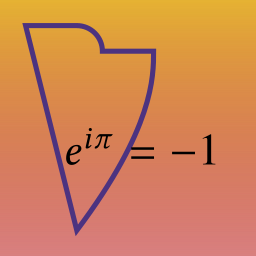

In [8]:
display.Image("./tmp/example2.png")